In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [3]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
# Groupby "Film" and "Category" to get count of 
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [5]:
# Count of nominations for titles across all award categories

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,Cleopatra,14
...,...,...
4828,Norbit,1
4829,One Day in September,1
4830,Between Heaven and Hell,1
4831,Homage to Chagall--The Colours of Love,1


In [6]:
# Count of wins for titles across all award categories

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4.head()

,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,Gigi,9


In [7]:
# Dataframe of all Academy Award nominations and wins
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df = wins_nominations_df.fillna(0)
wins_nominations_df

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,Cleopatra,14,5.0
...,...,...,...
4828,Norbit,1,0.0
4829,One Day in September,1,1.0
4830,Between Heaven and Hell,1,0.0
4831,Homage to Chagall--The Colours of Love,1,0.0


In [8]:
#Clean up movies_df by dropping unnamed column and resetting index

movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [9]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [10]:
# Merge on left dataframe to keep all streaming movies

# First merge cleaned movies dataframe with count of all award wins and nominations
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")

# Second merge above dataframe with Best Picture win ("True, False, NaN")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [11]:
# Slice new combined_df to count of Netflix movies that were nominated for Best Picture
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                32
Won Best Picture    32
dtype: int64

In [12]:
# "Won Best Picture" values are currently: 
# True = Won
# False = Nominated
# NaN = Not Nominated

combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [13]:
# Change "Won Best Picture" values to: 
# 2 = Won
# 1 = Nominated
# 0 = Not Nominated

combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [14]:
combined_df.head()

# Fill NaN in Nomination, Runtime, and Wins with 0
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [15]:
# Sort Academy Award nominated movies by highest IMDb rating ("Won Best Picture": 1=Nominated, 2=Won)
imdb_df = combined_df[combined_df["Won Best Picture"]==1].sort_values("IMDb", ascending=False).head(10)

# IMDb highest ratings, broken down by service
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Hulu"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Prime Video"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)
combined_df[(combined_df["Disney+"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

imdb_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
3564,The Green Mile,1999,18+,8.6,78%,0,1,0,0,0,Frank Darabont,"Crime,Drama,Fantasy,Mystery",United States,"English,French",189.0,4.0,0.0,1.0
4439,It's a Wonderful Life,1946,7+,8.6,94%,0,0,1,0,0,Frank Capra,"Drama,Family,Fantasy",United States,"English,French",130.0,5.0,0.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
16222,Toy Story 3,2010,all,8.3,98%,0,0,0,1,0,Lee Unkrich,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,5.0,2.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,4.0,0.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0
3563,Good Will Hunting,1997,18+,8.3,97%,0,1,0,0,0,Gus Van Sant,"Drama,Romance",United States,English,126.0,9.0,2.0,1.0


In [16]:
# Fill NaN values with Unknown
combined_df2 = combined_df.fillna("Unknown")


In [17]:
combined_df2

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,Unknown,6.2,Unknown,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,0.0,0.0,0.0
16740,The Poof Point,2001,7+,4.7,Unknown,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,0.0,0.0,0.0
16741,Sharks of Lost Island,2013,Unknown,5.7,Unknown,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0,0.0,0.0,0.0
16742,Man Among Cheetahs,2017,Unknown,6.6,Unknown,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0,0.0,0.0,0.0


In [18]:
#TOTAL: Count of number or movies per genre
genre_count = {}
for Genres in combined_df2["Genres"].values:

    genres_list = Genres.split(",")
    
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
    
#genre_count

genre_name = genre_count.keys() 
count_genre = genre_count.values() 
# print("Genres : ", str(genre_name)) 
# print("Count : ", str(count_genre))


allgenres_df=pd.DataFrame(count_genre, index=genre_name)
allgenres_df.head(5)

,0
Action,2683
Adventure,1778
Sci-Fi,1228
Thriller,3354
Comedy,4637


In [19]:
#NETFLIX: Count of number or movies per genre

netflix_genre_data= combined_df2[["Title", "Netflix", "Genres", "Wins"]].drop_duplicates()
netflix_genre_data2=netflix_genre_data.loc[netflix_genre_data["Netflix"]==1]
netflix_genre_data2.head()

,Title,Netflix,Genres,Wins
0,Inception,1,"Action,Adventure,Sci-Fi,Thriller",4.0
1,The Matrix,1,"Action,Sci-Fi",4.0
2,Avengers: Infinity War,1,"Action,Adventure,Sci-Fi",0.0
3,Back to the Future,1,"Adventure,Comedy,Sci-Fi",1.0
4,"The Good, the Bad and the Ugly",1,Western,0.0


In [20]:
net_genre_count = {}

for Genres in netflix_genre_data2["Genres"].values:

    net_genres_list = Genres.split(",")
    
    for genre in net_genres_list:
        genre = genre.strip()
        if genre not in net_genre_count:
            net_genre_count[genre]=0
        net_genre_count[genre] +=1
    
# net_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
net_genre_name = net_genre_count.keys() 
net_genre_count = net_genre_count.values() 

#Creating DataFrame for the top 10 genres
netflix_genre_df=pd.DataFrame(net_genre_count, index=net_genre_name)
netflix_genre_df= netflix_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_netflix_genres= netflix_genre_df[0:10]
top_netflix_genres


,Genre,Genre Count
0,Drama,1501
1,Comedy,1308
2,Thriller,652
3,Romance,551
4,Action,545
5,Documentary,511
6,Crime,372
7,Adventure,318
8,Family,315
9,Horror,266


<AxesSubplot:xlabel='Genre'>

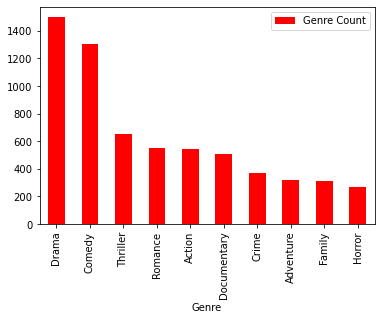

In [21]:
#NETFLIX GENRES: Bar Graph

top_netflix_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='r')

In [22]:

#HULU: Count of number or movies per genre

hulu_genre_data= combined_df2[["Title", "Hulu", "Genres", "Wins"]].drop_duplicates()
hulu_genre_data2=hulu_genre_data.loc[hulu_genre_data["Hulu"]==1]
hulu_genre_data2.head()

,Title,Hulu,Genres,Wins
67,Blackfish,1,"Documentary,News",0.0
97,Jiro Dreams of Sushi,1,Documentary,0.0
146,The Patriot,1,"Action,Drama,History,War",1.0
148,The Square,1,"Comedy,Drama",0.0
214,Hitch,1,"Comedy,Romance",0.0


In [23]:
hulu_genre_count = {}

for Genres in hulu_genre_data2["Genres"].values:

    hulu_genres_list = Genres.split(",")
    
    for genre in hulu_genres_list:
        genre = genre.strip()
        if genre not in hulu_genre_count:
            hulu_genre_count[genre]=0
        hulu_genre_count[genre] +=1
    
# hulu_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
hulu_genre_name = hulu_genre_count.keys() 
hulu_genre_count = hulu_genre_count.values() 

#Creating DataFrame for the top 10 genres
hulu_genre_df=pd.DataFrame(hulu_genre_count, index=hulu_genre_name)
hulu_genre_df= hulu_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_hulu_genres= hulu_genre_df[0:10]
top_hulu_genres


,Genre,Genre Count
0,Drama,438
1,Comedy,272
2,Thriller,221
3,Romance,151
4,Documentary,132
5,Action,129
6,Horror,124
7,Adventure,111
8,Family,105
9,Crime,100


<AxesSubplot:xlabel='Genre'>

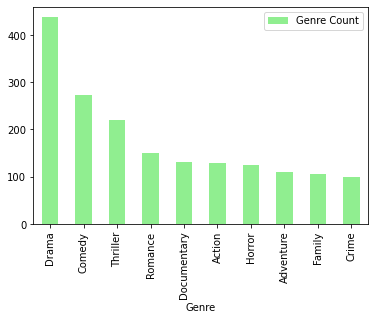

In [24]:
#HULU GENRES: Bar Graph
top_hulu_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightgreen')

In [25]:
#Prime Video: Count of number or movies per genre

prime_genre_data= combined_df2[["Title", "Prime Video", "Genres", "Wins"]].drop_duplicates()
prime_genre_data2=prime_genre_data.loc[prime_genre_data["Prime Video"]==1]
prime_genre_data2.head()

,Title,Prime Video,Genres,Wins
4,"The Good, the Bad and the Ugly",1,Western,0.0
6,The Pianist,1,"Biography,Drama,Music,War",3.0
11,3 Idiots,1,"Comedy,Drama",0.0
15,Once Upon a Time in the West,1,Western,0.0
31,Drive,1,"Crime,Drama",0.0


In [26]:
prime_genre_count = {}

for Genres in prime_genre_data2["Genres"].values:

    prime_genres_list = Genres.split(",")
    
    for genre in prime_genres_list:
        genre = genre.strip()
        if genre not in prime_genre_count:
            prime_genre_count[genre]=0
        prime_genre_count[genre] +=1
    
# prime_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
prime_genre_name = prime_genre_count.keys() 
prime_genre_count = prime_genre_count.values() 

#Creating DataFrame for the top 10 genres
prime_genre_df=pd.DataFrame(prime_genre_count, index=prime_genre_name)
prime_genre_df= prime_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_prime_genres= prime_genre_df[0:10]
top_prime_genres


,Genre,Genre Count
0,Drama,5437
1,Comedy,3004
2,Thriller,2632
3,Action,2049
4,Documentary,1895
5,Horror,1878
6,Romance,1691
7,Crime,1423
8,Adventure,1166
9,Mystery,983


<AxesSubplot:xlabel='Genre'>

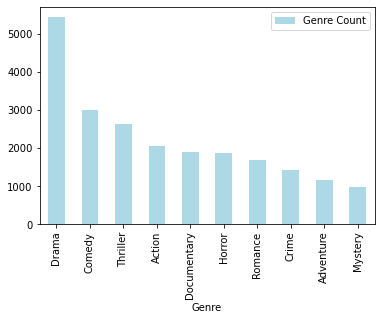

In [27]:
#PRIME VIDEO GENRES: Bar Graph
top_prime_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightblue')

In [28]:
#Prime Video: Count of number or movies per genre

disney_genre_data= combined_df2[["Title", "Disney+", "Genres", "Wins"]].drop_duplicates()
disney_genre_data2=disney_genre_data.loc[disney_genre_data["Disney+"]==1]
disney_genre_data2.head()

,Title,Disney+,Genres,Wins
95,Saving Mr. Banks,1,"Biography,Comedy,Drama",0.0
103,Amy,1,Drama,1.0
122,Bolt,1,"Animation,Adventure,Comedy,Drama,Family",0.0
125,The Princess and the Frog,1,"Animation,Adventure,Comedy,Family,Fantasy,Musi...",0.0
150,Miracle,1,"Biography,Drama,History,Sport",0.0


In [29]:
disney_genre_count = {}

for Genres in disney_genre_data2["Genres"].values:

    disney_genres_list = Genres.split(",")
    
    for genre in disney_genres_list:
        genre = genre.strip()
        if genre not in disney_genre_count:
            disney_genre_count[genre]=0
        disney_genre_count[genre] +=1
    
# disney_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
disney_genre_name = disney_genre_count.keys() 
disney_genre_count = disney_genre_count.values() 

#Creating DataFrame for the top 10 genres
disney_genre_df=pd.DataFrame(disney_genre_count, index=disney_genre_name)
disney_genre_df= disney_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_disney_genres= disney_genre_df[0:10]
top_disney_genres


,Genre,Genre Count
0,Family,430
1,Comedy,281
2,Adventure,258
3,Fantasy,176
4,Drama,162
5,Animation,146
6,Sci-Fi,88
7,Action,88
8,Musical,84
9,Romance,78


<AxesSubplot:xlabel='Genre'>

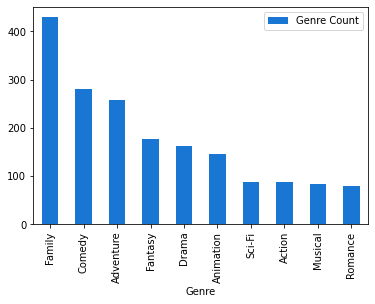

In [30]:
#DISNEY VIDEO GENRES: Bar Graph
top_disney_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='#1976d2')

In [31]:
# Dataframes of each service

netflix = combined_df.loc[combined_df["Netflix"] == 1]

hulu = combined_df.loc[combined_df["Hulu"] == 1]
hulu
primevideo = combined_df.loc[combined_df["Prime Video"] == 1]
primevideo
disney = combined_df.loc[combined_df["Disney+"] == 1]
disney.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
95,Saving Mr. Banks,2013,13+,7.5,79%,1,0,0,1,0,John Lee Hancock,"Biography,Comedy,Drama","United States,United Kingdom,Australia",English,125.0,1.0,0.0,0.0
103,Amy,2015,18+,7.8,95%,1,0,1,1,0,NaN,Drama,United States,English,60.0,1.0,1.0,0.0
122,Bolt,2008,7+,6.8,89%,1,0,0,1,0,"Byron Howard,Chris Williams","Animation,Adventure,Comedy,Drama,Family",United States,English,96.0,1.0,0.0,0.0
125,The Princess and the Frog,2009,all,7.1,85%,1,0,0,1,0,"Ron Clements,John Musker","Animation,Adventure,Comedy,Family,Fantasy,Musi...",United States,"English,French",97.0,3.0,0.0,0.0
150,Miracle,2004,7+,7.5,81%,1,0,0,1,0,Gavin O'Connor,"Biography,Drama,History,Sport","Canada,United States",English,135.0,0.0,0.0,0.0


In [32]:
# Oscar Nominated movies dataframe
netflix_nominations = netflix.loc[netflix["Nomination"] > 0]
hulu_nominations = hulu.loc[hulu["Nomination"] > 0]
primevideo_nominations = primevideo.loc[primevideo["Nomination"] > 0]
disney_nominations = disney.loc[disney["Nomination"] > 0]

In [33]:
# Count of award nominated movies
netflix_nom_movies = netflix_nominations["Title"].count()
hulu_nom_movies = hulu_nominations["Title"].count()
primevideo_nom_movies = primevideo_nominations["Title"].count()
disney_nom_movies = disney_nominations["Title"].count()

In [34]:
# Oscar Winning movies dataframe
netflix_wins = netflix.loc[netflix["Wins"] > 0]
hulu_wins = hulu.loc[hulu["Wins"] > 0]
primevideo_wins = primevideo.loc[primevideo["Wins"] > 0]
disney_wins = disney.loc[disney["Wins"] > 0]

netflix_win_movies = netflix_wins["Title"].count()
hulu_win_movies = hulu_wins["Title"].count()
primevideo_win_movies = primevideo_wins["Title"].count()
disney_win_movies = disney_wins["Title"].count()

In [35]:
# Nominated Best Picture
netflix_bp_nom = netflix.loc[netflix["Won Best Picture"] == 1]
hulu_bp_nom = hulu.loc[hulu["Won Best Picture"] == 1]
primevideo_bp_nom = primevideo.loc[primevideo["Won Best Picture"] == 1]
disney_bp_nom = disney.loc[disney["Won Best Picture"] == 1]

netflix_bp_nom_movies = netflix_bp_nom["Title"].count()
hulu_bp_nom_movies = hulu_bp_nom["Title"].count()
primevideo_bp_nom_movies = primevideo_bp_nom["Title"].count()
disney_bp_nom_movies = disney_bp_nom["Title"].count()

In [36]:
# Won Best Picture
netflix_bp = netflix.loc[netflix["Won Best Picture"] == 2]
hulu_bp = hulu.loc[hulu["Won Best Picture"] == 2]
primevideo_bp = primevideo.loc[primevideo["Won Best Picture"] == 2]
disney_bp = disney.loc[disney["Won Best Picture"] == 2]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

netflix_bp_win

3

In [37]:
# Count of movies that have been Nominated

# List of services to be index
ss_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

netflix_bp_win = netflix_bp["Title"].count()
hulu_bp_win = hulu_bp["Title"].count()
primevideo_bp_win = primevideo_bp["Title"].count()
disney_bp_win = disney_bp["Title"].count()

# Dataframe of wins, nominations
data = {
    'Nomination': [netflix_nom_movies, hulu_nom_movies, primevideo_nom_movies, disney_nom_movies],
    'Wins': [netflix_win_movies, hulu_win_movies, primevideo_win_movies, disney_win_movies],
    'Nominated Best Picture': [netflix_bp_nom_movies, hulu_bp_nom_movies, primevideo_bp_nom_movies, disney_bp_nom_movies],
    'Won Best Picture': [netflix_bp_win, hulu_bp_win, primevideo_bp_win, disney_bp_win],
}
ss_awards = pd.DataFrame(data, index =ss_names) 
ss_awards

,Nomination,Wins,Nominated Best Picture,Won Best Picture
Netflix,166,59,29,3
Hulu,66,19,7,1
Prime Video,377,102,18,3
Disney+,107,41,6,1


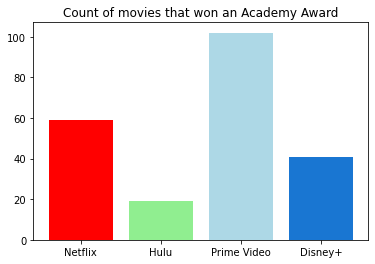

In [38]:
# Count of movies that won an Academy Award
win_plot = plt.bar(ss_names, ss_awards["Wins"], color=["red", "lightgreen", "lightblue", "#1976d2"])
plt.title("Count of movies that won an Academy Award")
plt.show()

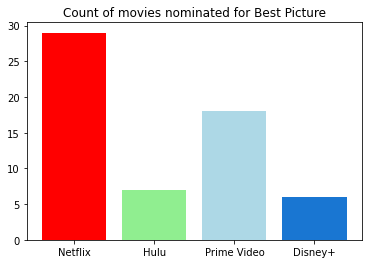

In [39]:
# Count of movies that were Nominated Best Picture
bpnom_plot = plt.bar(ss_names, ss_awards["Nominated Best Picture"], color=["red", "lightgreen", "lightblue", "#1976d2"])

plt.title("Count of movies nominated for Best Picture")
plt.show()

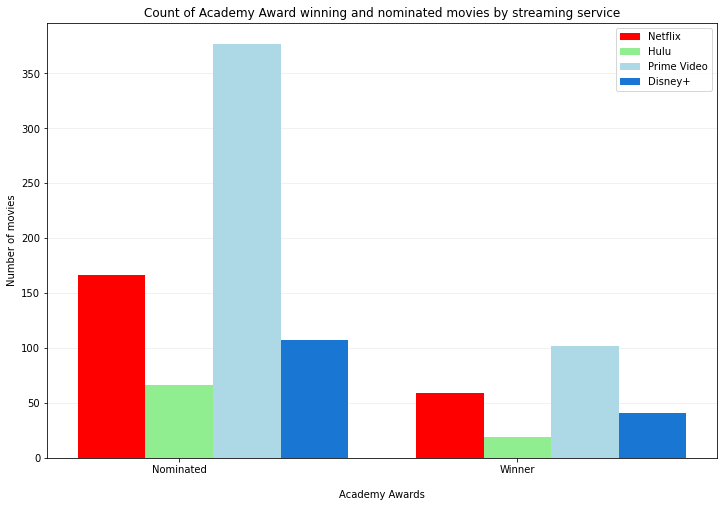

In [40]:
# Bars of award stats along x-axis
netflix_sum3 = ss_awards.iloc[0, 0:2]
hulu_sum3 = ss_awards.iloc[1, 0:2]
primevideo_sum3 = ss_awards.iloc[2, 0:2]
disney_sum3 = ss_awards.iloc[3, 0:2]

categories = ["Nomination", "Wins"]

x_axis3 = np.arange(len(categories))
bar_width = 0.2

fig, groupbars3 = plt.subplots(figsize=(12, 8))

b1 = groupbars3.bar(x_axis3, netflix_sum3, width=bar_width, label="Netflix", color="red")
b2 = groupbars3.bar(x_axis3+bar_width, hulu_sum3, width=bar_width, label="Hulu", color="lightgreen")
b3 = groupbars3.bar(x_axis3+bar_width*2, primevideo_sum3, width=bar_width, label="Prime Video", color="lightblue")
b4 = groupbars3.bar(x_axis3+bar_width*3, disney_sum3, width=bar_width, label="Disney+", color="#1976d2")

groupbars3.set_xticks(x_axis3 + bar_width)
groupbars3.set_xticklabels(["Nominated", "Winner"])
groupbars3.set_xlabel('Academy Awards', labelpad=15)
groupbars3.set_ylabel('Number of movies')
groupbars3.set_title('Count of Academy Award winning and nominated movies by streaming service')
groupbars3.set_axisbelow(True)
groupbars3.yaxis.grid(True, color='#EEEEEE')
groupbars3.legend()
plt.show()

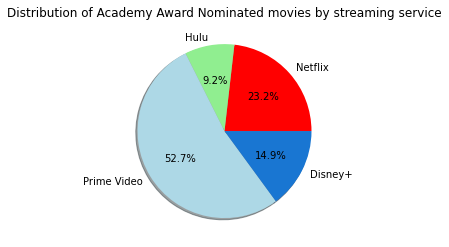

In [41]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Nomination"], labels=ss_names, colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award Nominated movies by streaming service")
plt.show()

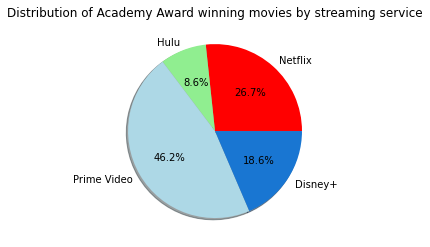

In [42]:
# All Academy Award Nominated movies by streaming service
plt.pie(ss_awards["Wins"], labels=ss_names, colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Academy Award winning movies by streaming service")
plt.show()

In [43]:
#Create new dataframe excluding null values from 'Country'
country_df = combined_df[combined_df['Country'].isna()==False]

#Split genres name and count no. of movies in each genre
country_count = {}
for x in country_df["Country"].values:

    country_list = x.split(",")
    #print (country_list)
    for y in country_list:
        y = y.strip()
        #print(y)
        if y not in country_count:
            country_count[y]=0
        country_count[y] +=1
        #print(country_count)
    
#country_count

country_name = country_count.keys() 
count_country = country_count.values() 



allcountries_df=pd.DataFrame(count_country, country_name)
allcountries_df.head(5)

,0
United States,10486
United Kingdom,1713
Italy,417
Spain,329
West Germany,69


In [44]:
#Select the top 15 countries by value counts
country_top_df = allcountries_df[0:15]

country_top_df=country_top_df.reset_index().rename(columns={'index':'Country', 0:'Counts'})

country_top_df= country_top_df.sort_values('Counts',ascending = False)

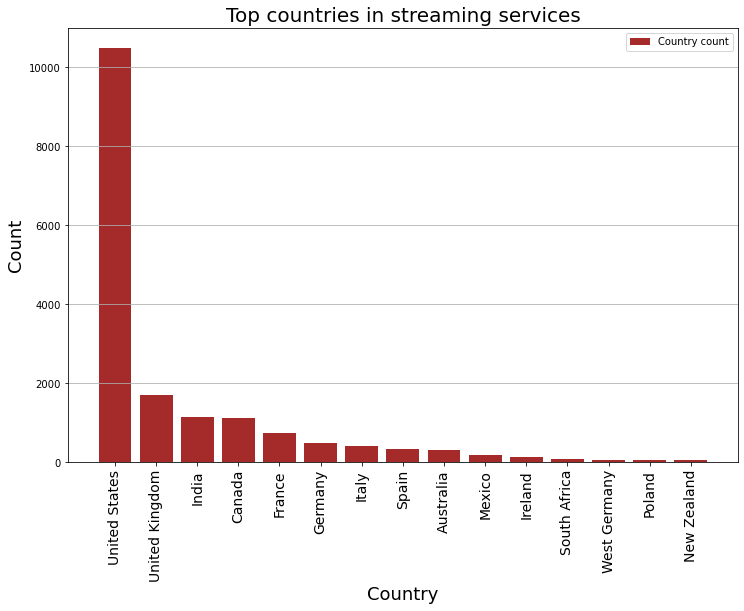

In [45]:
#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/countries.png")
plt.show()


In [46]:
#Create new dataframe excluding null values from 'Language'
language_df = combined_df[combined_df['Language'].isna()==False]

#Split genres name and count no. of movies in each genre
language_count = {}
for x in language_df["Language"].values:

    language_list = x.split(",")
    #print (language_list)
    for y in language_list:
        y = y.strip()
        #print(y)
        if y not in language_count:
            language_count[y]=0
        language_count[y] +=1
        #print(country_count)
    
#country_count

language_name = language_count.keys() 
count_language = language_count.values() 



alllanguages_df=pd.DataFrame(count_language, language_name)
alllanguages_df.head(5)

,0
English,13233
Japanese,317
French,799
Italian,440
Spanish,872


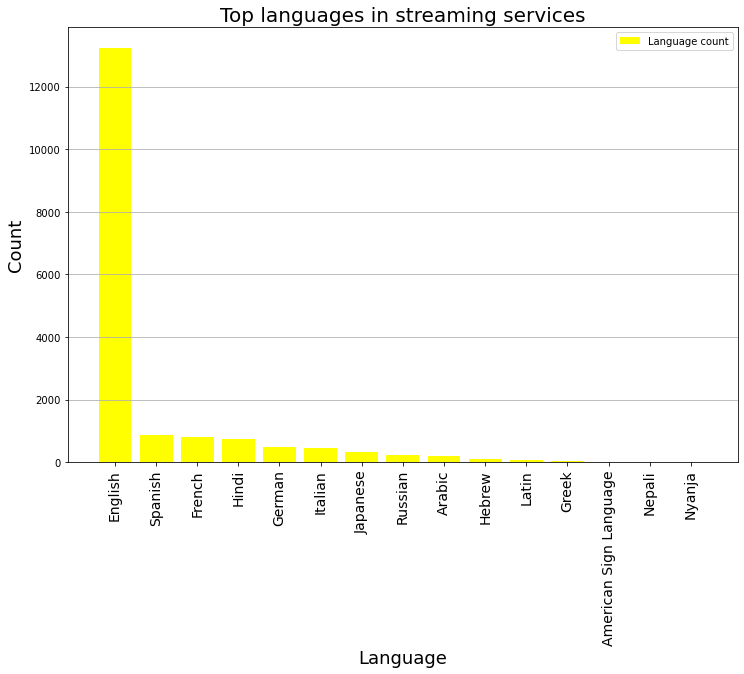

In [47]:
#Select the top 15 languages by value counts
language_top = alllanguages_df[0:15]
language_top_df=language_top.reset_index().rename(columns={'index':'Language', 0:'Counts'})
language_top_df= language_top_df.sort_values('Counts',ascending = False)

#Specify x & y values
xvalues = language_top_df['Language'].values
yvalues= language_top_df['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='yellow', alpha = 1, align="center")
plt.xticks(language_top_df['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in streaming services", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [48]:
# List of service names
service_names = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Create a dataframe for each service
#netflix_data = combined_df.copy()
netflix_data = combined_df[combined_df['Netflix']==1]


#prime_data = combined_df.copy()
prime_data = combined_df[combined_df['Prime Video']==1]


#hulu_data = combined_df.copy()
hulu_data = combined_df[combined_df['Hulu']==1]


#disney_data = combined_df.copy()
disney_data = combined_df[combined_df['Disney+']==1]

In [49]:
#Create separate dataframes for streaming services with only US data in it

netflix_data_US = netflix_data[(netflix_data['Country'] == 'United States')]

prime_data_US = prime_data[(prime_data['Country'] == 'United States')]

hulu_data_US = hulu_data[(hulu_data['Country'] == 'United States')]

disney_data_US = disney_data[(disney_data['Country'] == 'United States')]

In [50]:
#Analysing no. of movies in each streaming service for their Rotten Tomotaes scoring

#Fill Nan values in Rotten Tomatoes with 0
combined_df["Rotten Tomatoes"] = combined_df["Rotten Tomatoes"].fillna(0)

#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")

rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)

rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings', 'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df.head()

,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126


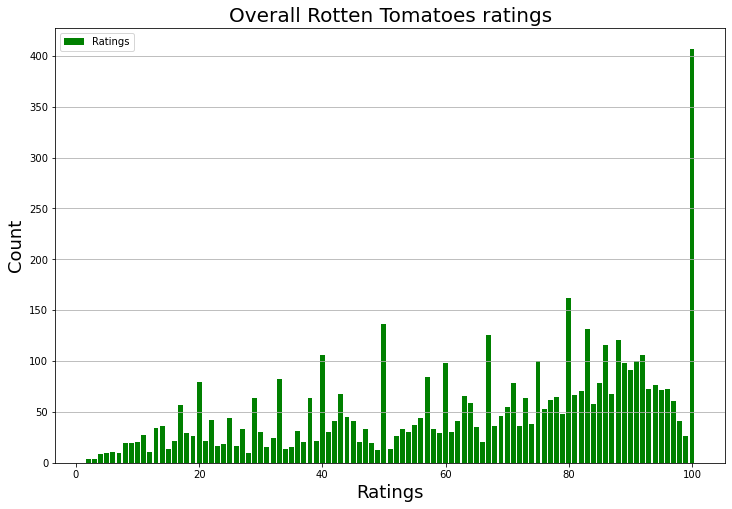

In [51]:
rot_x = rotten_tomatoes_df['Ratings'].values.astype("int")
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
ticks=(np.arange(10, 100, step=10))
# plt.xticks(ticks, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/rot_tom.png")
plt.show()


In [52]:
#Analysing streaming services for content with 100% Rotten Tomatoes scoring. (Taking 100% RT score because the
#highest no. of movies is at this score. Refer to 'Overall RT ratings' plot)


# List of service names
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]

#Taking data of RT score 100% (first row of value counts)
netflix_rt = netflix_data['Rotten Tomatoes'].value_counts()[0]
hulu_rt =hulu_data['Rotten Tomatoes'].value_counts()[0]
prime_rt = prime_data['Rotten Tomatoes'].value_counts()[0] 
disney_rt = disney_data['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt, hulu_rt, prime_rt, disney_rt]})
                                                                         
rot_tom_scores

,Streaming Service,No. of movies with 100% RT score
0,Netflix,130
1,Hulu,18
2,Prime Video,257
3,Disney+,19


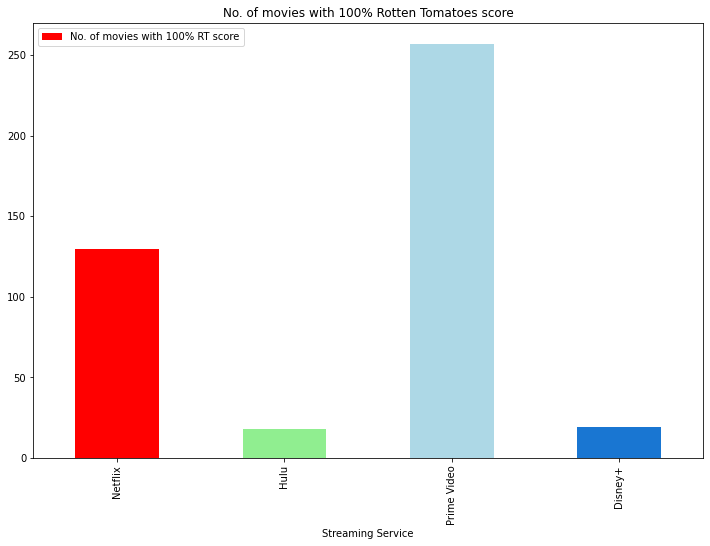

In [53]:
#plt.figure(figsize=(12,8))
rot_tom_scores.plot.bar('Streaming Service', 'No. of movies with 100% RT score', 
                                       color=["red", "lightgreen", "lightblue", "#1976d2"], 
                                       figsize=(12,8), title=('No. of movies with 100% Rotten Tomatoes score'))
                                                                               
plt.show()
#plt.title('No. of movies with 100% Rotten Tomatoes score')

In [54]:
#Analysing 100% RT score for movies in US only

netflix_rt_US = netflix_data_US['Rotten Tomatoes'].value_counts()[0]
hulu_rt_US =hulu_data_US['Rotten Tomatoes'].value_counts()[0]
prime_rt_US = prime_data_US['Rotten Tomatoes'].value_counts()[0] 
disney_rt_US = disney_data_US['Rotten Tomatoes'].value_counts()[0]                                                             
                                                            
                                                             

rot_tom_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with 100% RT score' :[netflix_rt_US, hulu_rt_US,
                                                                     prime_rt_US, disney_rt_US]})
                                                                         
rot_tom_scores_US

,Streaming Service,No. of movies with 100% RT score
0,Netflix,63
1,Hulu,12
2,Prime Video,141
3,Disney+,15


<AxesSubplot:title={'center':'No. of movies with 100% Rotten Tomatoes score (US)'}, xlabel='Streaming Service'>

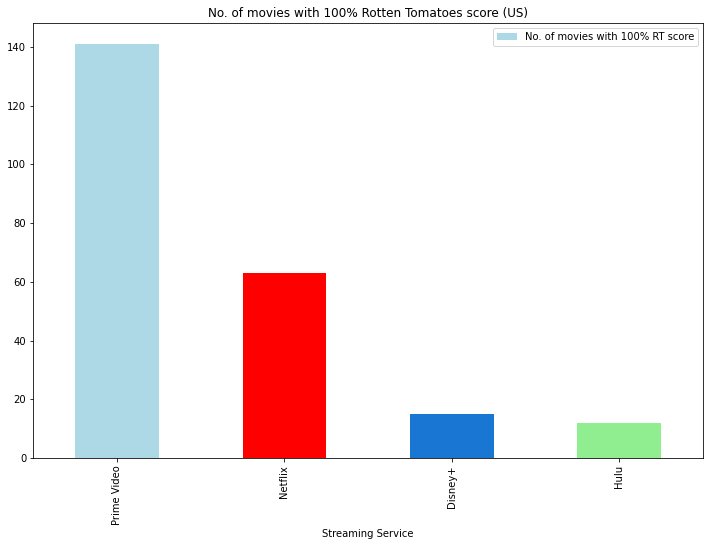

In [55]:
#Analysing 100% RT score for movies in US only
#plt.figure(figsize=(12,8))
rot_tom_scores_US.sort_values("No. of movies with 100% RT score", ascending=False).plot.bar(
                        'Streaming Service', 'No. of movies with 100% RT score', 
                           color=["lightblue", "red", "#1976d2", "lightgreen"], 
                            title=('No. of movies with 100% Rotten Tomatoes score (US)'), figsize=(12,8) )
                                                                               
#plt.show()

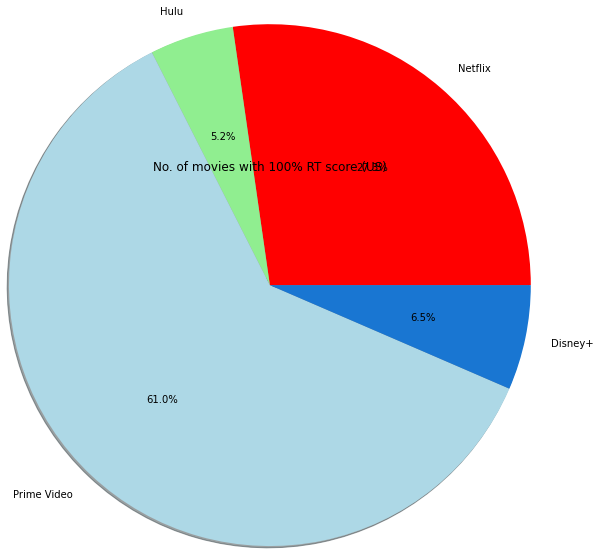

In [56]:
#Plot pie chart for 100% RT score in US
plt.pie(rot_tom_scores_US["No. of movies with 100% RT score"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%", radius=3)

plt.title("No. of movies with 100% RT score (US)")
plt.show()

In [57]:
#Netflix movies count for year 2015-2020
netflix_new = netflix_data[netflix_data["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new

netflix_new_df = netflix_new.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count for year 2015-2020
prime_new = prime_data[prime_data["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new

prime_new_df = prime_new.to_frame().reset_index()
prime_new_df

#Hulu movies count for year 2015-2020
hulu_new = hulu_data[hulu_data["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new

hulu_new_df = hulu_new.to_frame().reset_index()
hulu_new_df

#Disney movies count for year 2015-2020
disney_new = disney_data[disney_data["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new

disney_new_df = disney_new.to_frame().reset_index()
disney_new_df

,Year,Disney+
0,2015,10
1,2016,17
2,2017,22
3,2018,16
4,2019,23
5,2020,9


In [58]:
merge1 = pd.merge(hulu_new_df, disney_new_df, on='Year' )
merge2 = pd.merge(prime_new_df, netflix_new_df, on='Year')
year_merge = pd.merge(merge1, merge2, on='Year')
year_merge.set_index('Year')

# merge1 = pd.merge(netflix_new_df, hulu_new_df, on='Year' )
# merge2 = pd.merge(prime_new_df, disney_new_df, on='Year')
# year_merge = pd.merge(merge1, merge2, on='Year')
# year_merge.set_index('Year')

,Hulu,Disney+,Prime Video,Netflix
Year,,,,
2015,61,10,765,272
2016,62,17,730,444
2017,124,22,763,569
2018,158,16,625,560
2019,104,23,172,428
2020,6,9,31,104


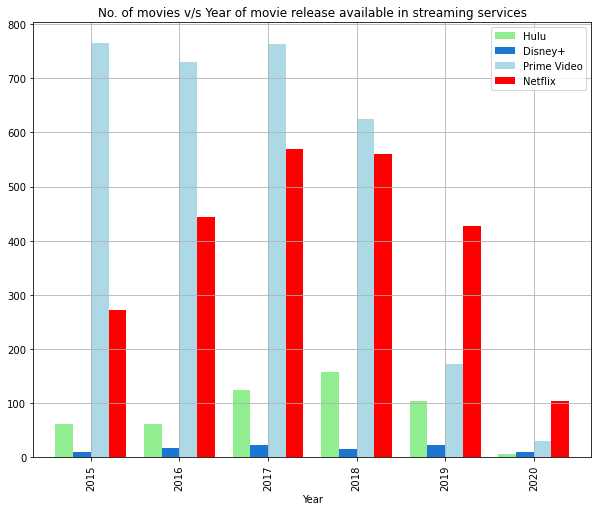

In [59]:
year_merge.plot.bar('Year',  color=["lightgreen", "#1976d2", "lightblue", "red"], figsize=(10,8), width=.8)
plt.title('No. of movies v/s Year of movie release available in streaming services')
plt.grid()

# year_merge.plot.bar('Year',  color=["red", "lightgreen", "lightblue", "#1976d2"], figsize=(10,8), width=.8)
# plt.title('No. of movies v/s Year of movie release available in streaming services')
# plt.grid()

In [60]:
#Netflix movies count in US for year 2015-2020 
netflix_new_US = netflix_data_US[netflix_data_US["Year"]>=2015].groupby(["Year"])['Netflix'].count()      
netflix_new_US

netflix_new_df_US = netflix_new_US.to_frame().reset_index()
#netflix_new_df.T
#netflix_new_df.plot.bar('Year', 'Netflix', color='b')

#Prime Video movies count in US for year 2015-2020
prime_new_US = prime_data_US[prime_data_US["Year"]>=2015].groupby(["Year"])['Prime Video'].count()      
prime_new_US

prime_new_df_US = prime_new_US.to_frame().reset_index()
prime_new_df_US.T

#Hulu movies count in US for year 2015-2020
hulu_new_US = hulu_data_US[hulu_data_US["Year"]>=2015].groupby(["Year"])['Hulu'].count()      
hulu_new_US

hulu_new_df_US = hulu_new_US.to_frame().reset_index()
hulu_new_df_US.T

#Disney movies count in US for year 2015-2020
disney_new_US = disney_data_US[disney_data_US["Year"]>=2015].groupby(["Year"])['Disney+'].count()      
disney_new_US

disney_new_df_US = disney_new_US.to_frame().reset_index()
disney_new_df_US

,Year,Disney+
0,2015,9
1,2016,15
2,2017,18
3,2018,13
4,2019,17
5,2020,9


In [61]:
merge1_US = pd.merge(hulu_new_df_US, disney_new_df_US, on='Year' )
merge2_US = pd.merge(prime_new_df_US, netflix_new_df_US, on='Year')
year_merge_US = pd.merge(merge1_US, merge2_US, on='Year')
year_merge_US.set_index('Year')

,Hulu,Disney+,Prime Video,Netflix
Year,,,,
2015,34,9,410,93
2016,35,15,409,153
2017,59,18,390,219
2018,90,13,302,197
2019,65,17,100,181
2020,5,9,16,53


In [62]:
# merge1_US = pd.merge(netflix_new_df_US, hulu_new_df_US, on='Year' )
# merge2_US = pd.merge(prime_new_df_US, disney_new_df_US, on='Year')
# year_merge_US = pd.merge(merge1_US, merge2_US, on='Year')
# year_merge_US.set_index('Year')

Text(0.5, 1.0, 'No. of movies v/s Year of movie release available in streaming services (US)')

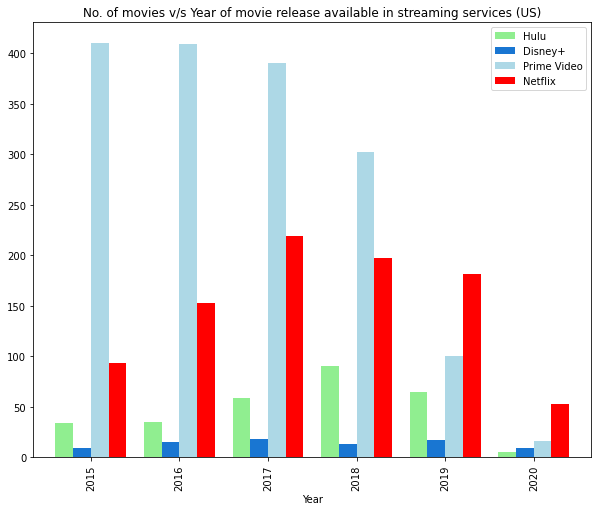

In [63]:
new_release_US=year_merge_US.plot.bar('Year',  color=["lightgreen", "#1976d2", "lightblue", "red"], figsize=(10,8), width=.8)
plt.title('No. of movies v/s Year of movie release available in streaming services (US)')

In [64]:
# new_release_US=year_merge_US.plot.bar('Year',  color=["red", "lightgreen", "lightblue", "#1976d2"], figsize=(10,8), width=.8)
# plt.title('No. of movies v/s Year of movie release available in streaming services (US)')

In [65]:
#Analysing IMDb score for movies in US only

#Create dataframes for each streaming service with IMDb > 7

netflix_imdb_US = netflix_data_US[netflix_data_US['IMDb'] > 7]
net_imdb_count = netflix_imdb_US['IMDb'].count()

hulu_imdb_US =hulu_data_US[hulu_data_US['IMDb']> 7]
hulu_imdb_count = hulu_imdb_US['IMDb'].count()


prime_imdb_US = prime_data_US[prime_data_US['IMDb']> 7] 
prime_imdb_count = prime_imdb_US['IMDb'].count()


disney_imdb_US = disney_data_US[disney_data_US['IMDb']> 7]  
disney_imdb_count = disney_imdb_US['IMDb'].count()
                                                            
                                                             

imdb_scores_US = pd.DataFrame({'Streaming Service': streaming_services,
                                'No. of movies with IMDb > 7' :[net_imdb_count, hulu_imdb_count,
                                                                     prime_imdb_count, disney_imdb_count]})
                                                                         
imdb_scores_US

,Streaming Service,No. of movies with IMDb > 7
0,Netflix,327
1,Hulu,106
2,Prime Video,1059
3,Disney+,135


<AxesSubplot:title={'center':'No. of movies with IMDb > 7 (US)'}, xlabel='Streaming Service'>

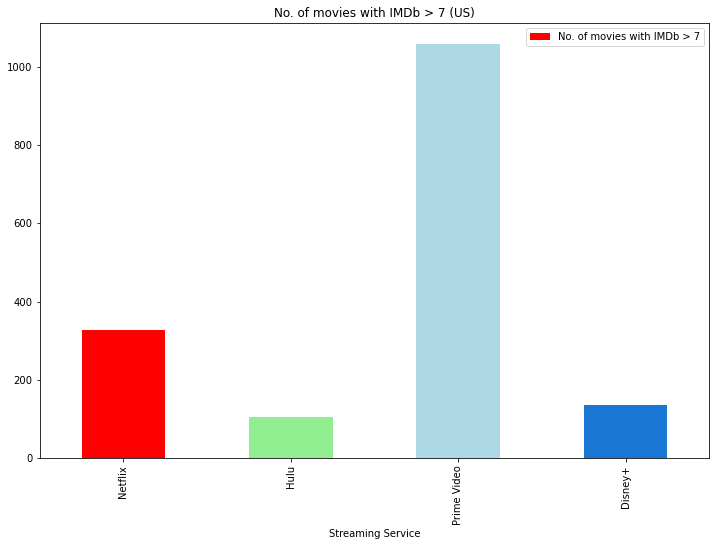

In [66]:
#Analysing movies with IMDb > 7 in US only
#plt.figure(figsize=(12,8))
imdb_scores_US.plot.bar('Streaming Service', 'No. of movies with IMDb > 7', 
                           color=["red", "lightgreen", "lightblue", "#1976d2"], 
                            title=('No. of movies with IMDb > 7 (US)'), figsize=(12,8) )

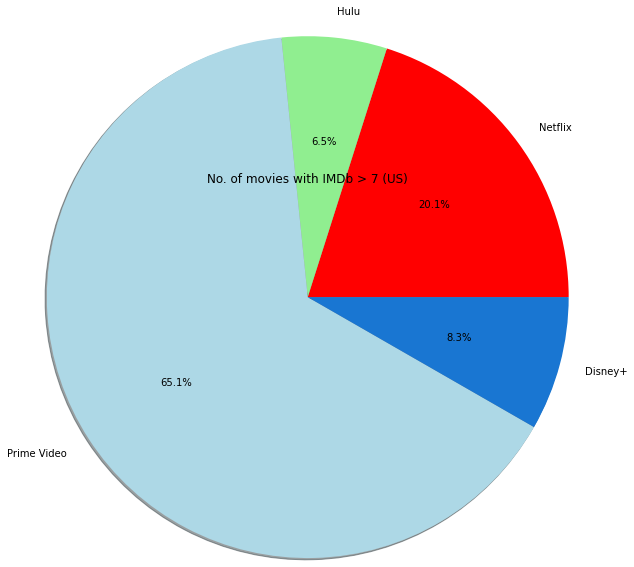

In [67]:
plt.pie(imdb_scores_US["No. of movies with IMDb > 7"], labels=streaming_services, 
        colors=["red", "lightgreen", "lightblue", "#1976d2"], shadow=True, autopct="%1.1f%%", radius=3)

plt.title("No. of movies with IMDb > 7 (US)")
plt.show()

In [68]:
#Analysing mean IMDb score across platforms in US only
netflix_imdb_mean = netflix_data_US['IMDb'].mean()

hulu_imdb_mean =hulu_data_US['IMDb'].mean()



prime_imdb_mean = prime_data_US['IMDb'].mean() 



disney_imdb_mean = disney_data_US['IMDb'].mean() 

                                                            
                                                             

imdb_scores_mean = pd.DataFrame({'Streaming Service': streaming_services,
                                'Mean IMDb' :[netflix_imdb_mean, hulu_imdb_mean,
                                                                     prime_imdb_mean, disney_imdb_mean]})
                                                                         
imdb_scores_mean
#netflix_imdb_mean

,Streaming Service,Mean IMDb
0,Netflix,6.246517
1,Hulu,6.091383
2,Prime Video,5.591975
3,Disney+,6.442729


<AxesSubplot:title={'center':'Mean IMDb rating across the streaming platforms'}, xlabel='Streaming Service'>

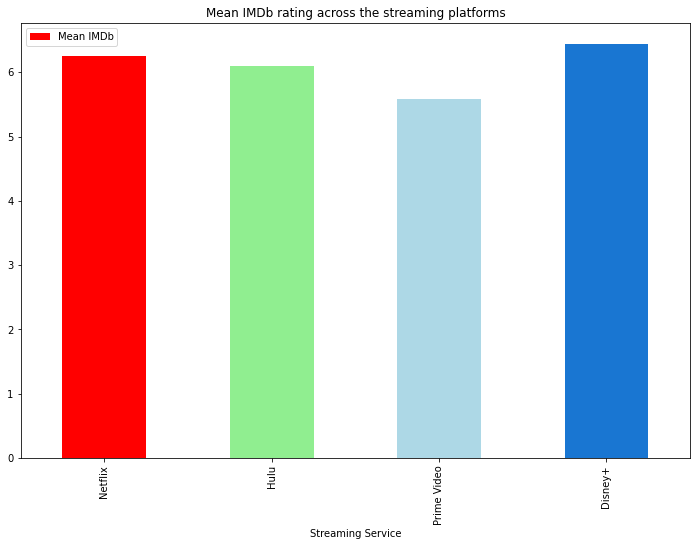

In [69]:
#Analysing mean IMDb score across platforms in US only
#plt.figure(figsize=(12,8))
imdb_scores_mean.plot.bar('Streaming Service', 'Mean IMDb', 
                           color=["red", "lightgreen", "lightblue", "#1976d2"], 
                            title=('Mean IMDb rating across the streaming platforms'), figsize=(12,8) )

In [70]:
#Split and Create new dataframe for movie languages in Netflix
netflix_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Netflix']==1)]


#Split languages names and count no. of movies in each languages
netflix_lang_count = {}
for x in netflix_lang["Language"].values:

    netflix_lang_list = x.split(",")
    #print (netflix_lang_list)
    for y in netflix_lang_list:
        y = y.strip()
        #print(y)
        if y not in netflix_lang_count:
            netflix_lang_count[y]=0
        netflix_lang_count[y] +=1
        #print(netflix_lang_count)
    
#netflix_lang_count

netflixlang_name = netflix_lang_count.keys() 
count_netflixlang = netflix_lang_count.values() 



all_netflix_lang_df=pd.DataFrame(count_netflixlang, netflixlang_name)
#all_netflix_lang_df.head(21)

netflix_lang_sort=all_netflix_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
netflix_lang_sort= netflix_lang_sort.sort_values('Counts',ascending = False)

netflix_lang_sort.head(10)

,Language,Counts
0,English,2264
10,Hindi,377
4,Spanish,332
2,French,212
5,German,106
1,Japanese,91
8,Arabic,89
24,Mandarin,83
3,Italian,67
42,Turkish,58


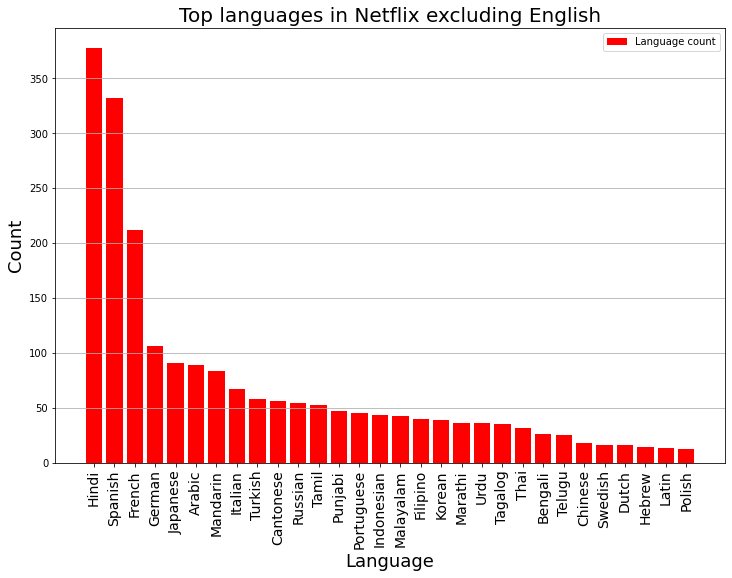

In [71]:
#Select the top 30 languages excluding English by value counts


netflix_lang_top = netflix_lang_sort[1:31]



#Specify x & y values
xvalues = netflix_lang_top['Language'].values
yvalues= netflix_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='red', alpha = 1, align="center")
plt.xticks(netflix_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Netflix excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [72]:
#Split and Create new dataframe for movie languages in Prime Video
prime_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Prime Video']==1)]


#Split languages names and count no. of movies in each languages
prime_lang_count = {}
for x in prime_lang["Language"].values:

    prime_lang_list = x.split(",")
    
    for y in prime_lang_list:
        y = y.strip()
        
        if y not in prime_lang_count:
            prime_lang_count[y]=0
        prime_lang_count[y] +=1
        
    


primelang_name = prime_lang_count.keys() 
count_primelang = prime_lang_count.values() 



all_prime_lang_df=pd.DataFrame(count_primelang, primelang_name)
#all_prime_lang_df.head(21)


prime_lang_sort=all_prime_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
prime_lang_sort= prime_lang_sort.sort_values('Counts',ascending = False)

prime_lang_sort.head(10)

,Language,Counts
1,English,10088
13,French,522
5,Spanish,493
4,Hindi,424
0,Italian,352
2,German,341
22,Mandarin,268
20,Japanese,195
3,Russian,157
30,Cantonese,127


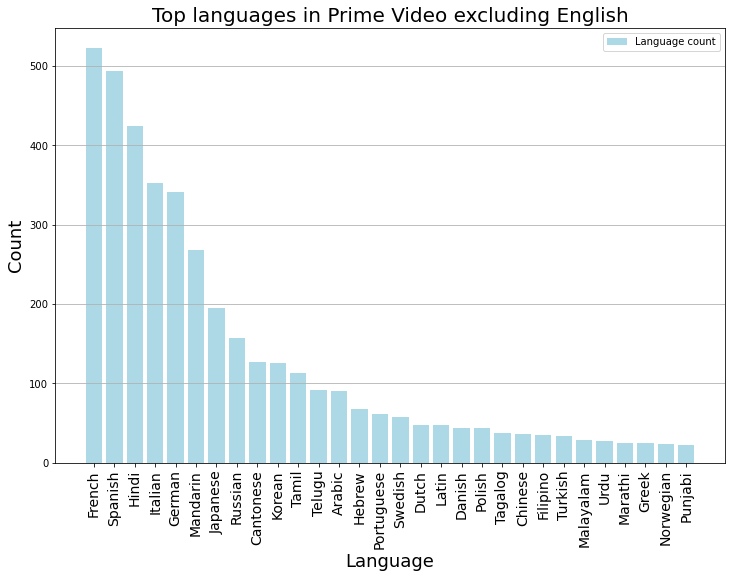

In [73]:
#Select the top 30 languages excluding English by value counts
prime_lang_top = prime_lang_sort[1:31]


#Specify x & y values
xvalues = prime_lang_top['Language'].values
yvalues= prime_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='lightblue', alpha = 1, align="center")
plt.xticks(prime_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Prime Video excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [74]:
#Split and Create new dataframe for movie languages in Hulu
hulu_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Hulu']==1)]


#Split languages names and count no. of movies in each languages
hulu_lang_count = {}
for x in hulu_lang["Language"].values:

    hulu_lang_list = x.split(",")
    
    for y in hulu_lang_list:
        y = y.strip()
        
        if y not in hulu_lang_count:
            hulu_lang_count[y]=0
        hulu_lang_count[y] +=1
        
    


hululang_name = hulu_lang_count.keys() 
count_hululang = hulu_lang_count.values() 



all_hulu_lang_df=pd.DataFrame(count_hululang, hululang_name)
#all_hulu_lang_df.head(21)


hulu_lang_sort=all_hulu_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
hulu_lang_sort= hulu_lang_sort.sort_values('Counts',ascending = False)

hulu_lang_sort.head(10)

,Language,Counts
0,English,815
3,French,73
1,Spanish,66
14,German,41
2,Japanese,35
8,Italian,23
15,Russian,18
7,Mandarin,17
6,Korean,16
5,Danish,13


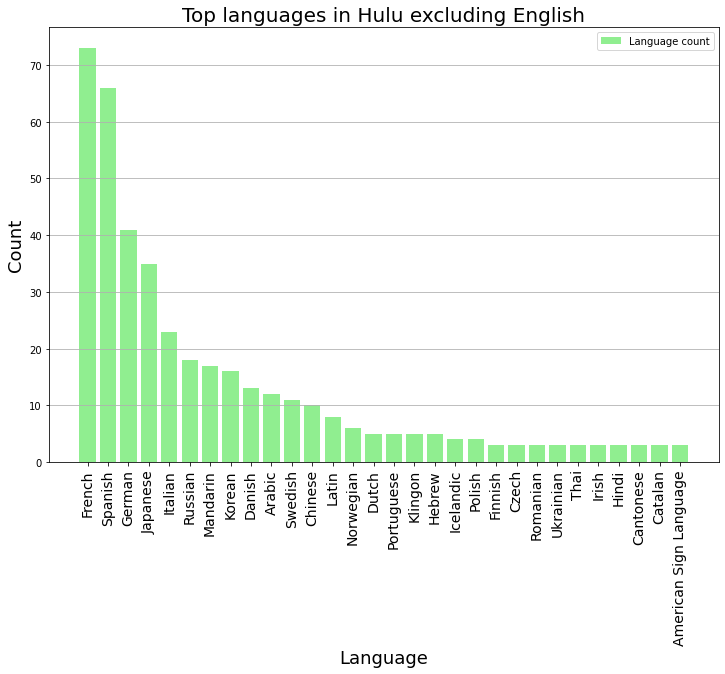

In [75]:
#Select the top 30 languages excluding English by value counts
hulu_lang_top = hulu_lang_sort[1:31]


#Specify x & y values
xvalues = hulu_lang_top['Language'].values
yvalues= hulu_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='lightgreen', alpha = 1, align="center")
plt.xticks(hulu_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Hulu excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [76]:
#Split and Create new dataframe for movie languages in Disney
disney_lang = combined_df[(combined_df['Language'].isna()==False) & (combined_df['Disney+']==1)]


#Split languages name and count no. of movies in each language
disney_lang_count = {}
for x in disney_lang["Language"].values:

    disney_lang_list = x.split(",")
    
    for y in disney_lang_list:
        y = y.strip()
        
        if y not in disney_lang_count:
            disney_lang_count[y]=0
        disney_lang_count[y] +=1
        
    


disneylang_name = disney_lang_count.keys() 
count_disneylang = disney_lang_count.values() 



all_disney_lang_df=pd.DataFrame(count_disneylang, disneylang_name)
#all_disney_lang_df.head(21)


disney_lang_sort=all_disney_lang_df.reset_index().rename(columns={'index':'Language', 0:'Counts'})
disney_lang_sort= disney_lang_sort.sort_values('Counts',ascending = False)

disney_lang_sort.head(10)

,Language,Counts
0,English,557
1,French,30
14,Spanish,20
8,German,17
22,Italian,11
27,Mandarin,7
15,Japanese,6
12,Xhosa,4
20,Korean,4
4,Russian,4


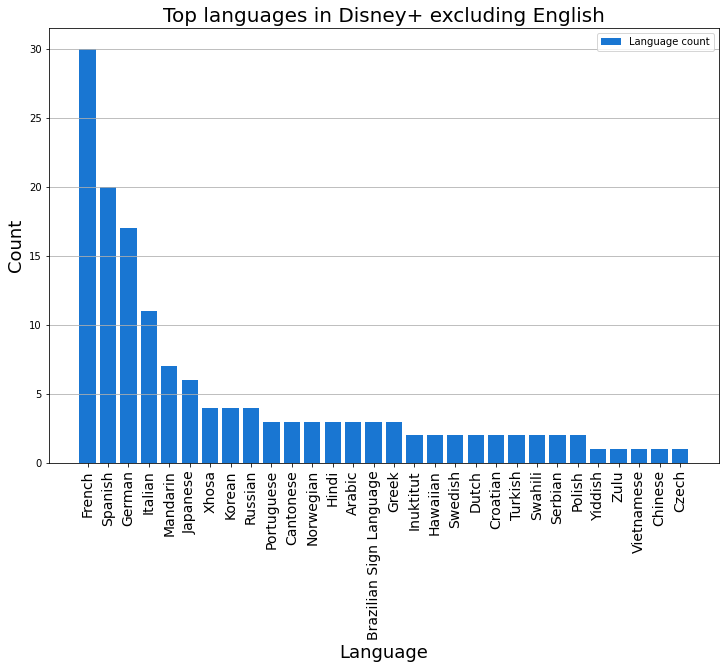

In [77]:
#Select the top 30 languages excluding English by value counts
disney_lang_top = disney_lang_sort[1:31]


#Specify x & y values
xvalues = disney_lang_top['Language'].values
yvalues= disney_lang_top['Counts'].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Language count', color='#1976d2', alpha = 1, align="center")
plt.xticks(disney_lang_top['Language'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top languages in Disney+ excluding English", fontsize=20)
plt.xlabel("Language", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
#plt.savefig("Images/languages.png")
plt.show()

In [78]:
#Merge the language dataframes of all streaming services
lang_merge1=pd.merge(netflix_lang_sort, prime_lang_sort, on='Language')
lang_merge2=pd.merge(hulu_lang_sort, disney_lang_sort, on='Language')
lang_merge_all=pd.merge(lang_merge1, lang_merge2, on='Language')
lang_merge_all = lang_merge_all.rename(columns=({'Counts_x_x': 'Netflix', 'Counts_y_x': 'Prime Video',
                                'Counts_x_y': 'Hulu','Counts_y_y':'Disney+' }))
lang_merge_all.head(15)

,Language,Netflix,Prime Video,Hulu,Disney+
0,English,2264,10088,815,557
1,Hindi,377,424,3,3
2,Spanish,332,493,66,20
3,French,212,522,73,30
4,German,106,341,41,17
5,Japanese,91,195,35,6
6,Arabic,89,90,12,3
7,Mandarin,83,268,17,7
8,Italian,67,352,23,11
9,Turkish,58,34,2,2
